In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X =  iris.data
y = iris.target

In [4]:
X.shape, y.shape

((150, 4), (150,))

In [5]:
# 정답 데이터 원핫인코딩(텐서플로우에서 지원하는 원핫인코딩 기능)
from tensorflow.keras.utils import to_categorical

In [6]:
y_one_hot = to_categorical(y)
y_one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [7]:
# 학습 및 평가데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot,
                                                    test_size=0.2,
                                                    random_state=3
                                                   )

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


### 신경망 모델링
- 1. 신경망 구조설계
- 2. 학습/평가 방법 설정
- 3. 학습 및 시각화
- 4. 평가

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층 + 중간층
# relu : 최근에 가장 많이 사용하는 성능 좋은 활성화함수
model.add(Dense(64, input_dim=4, activation='relu'))

# 중간층(은닉층)
model.add(Dense(32, activation='relu'))    # 하나의 층
model.add(Dense(16, activation='relu'))    # 하나의 층

# 출력층
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 2. 학습/평가방법 설정
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',       # 최근에 가장 많이 사용되는 최적화 함수
              metrics=['acc']        
             )

In [12]:
# 3. 학습
h = model.fit(X_train, y_train,
              epochs=200        # 학습 횟수 설정
             )

Epoch 1/200
4/4 [==============================] - 0s 748us/step - loss: 1.3309 - acc: 0.1500
Epoch 2/200
4/4 [==============================] - 0s 738us/step - loss: 1.0939 - acc: 0.6583
Epoch 3/200
4/4 [==============================] - 0s 499us/step - loss: 0.9469 - acc: 0.6667
Epoch 4/200
4/4 [==============================] - 0s 499us/step - loss: 0.8493 - acc: 0.6667
Epoch 5/200
4/4 [==============================] - 0s 499us/step - loss: 0.7668 - acc: 0.6667
Epoch 6/200
4/4 [==============================] - 0s 499us/step - loss: 0.7162 - acc: 0.6667
Epoch 7/200
4/4 [==============================] - 0s 499us/step - loss: 0.6796 - acc: 0.8750
Epoch 8/200
4/4 [==============================] - 0s 499us/step - loss: 0.6448 - acc: 0.9667
Epoch 9/200
4/4 [==============================] - 0s 499us/step - loss: 0.6152 - acc: 0.9667
Epoch 10/200
4/4 [==============================] - 0s 748us/step - loss: 0.5883 - acc: 0.9750
Epoch 11/200
4/4 [==============================] - 0s 249u

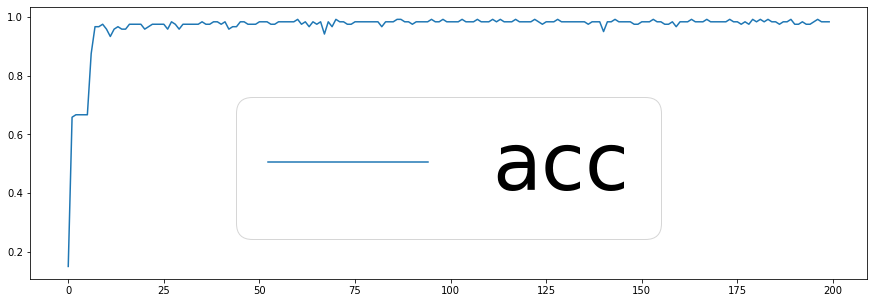

In [13]:
# 3. 시각화
plt.figure(figsize=(15,5))

plt.plot(h.history['acc'], label='acc')    

plt.legend(prop={'size':80}, loc='lower center')
plt.show()

In [14]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 997us/step - loss: 0.0484 - acc: 0.9667


[0.04843408614397049, 0.9666666388511658]

### 1. 회귀
- loss = mse(평균제곱오차)
- 출력층 뉴런의 개수 : 1
- 출력층 활성화 함수 : linear(항등함수) → 디폴트 값

### 2. 2진분류
- loss : binary_crossentropy
- 출력층 뉴런의 개수 : 1
- 출력층 활성화 함수 : sigmoid

### 3. 다중분류
- loss : categorical_crossentropy
- 출력층 뉴런의 개수 : 정답의 개수(원핫인코딩 된 레이블의 개수)
- 출력층 활성화 함수 : softmax